In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import time

In [2]:
start_script = time.time()

In [3]:
from sklearn.datasets import load_boston

In [4]:
data = load_boston()

In [5]:
feat = pd.DataFrame(data['data'], columns=data['feature_names'])

In [6]:
target = data['target']

In [7]:
feat.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
feat.info() #Everything is a number so no need to deal with categoricals

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [9]:
df = feat.copy()

In [10]:
df['medv'] = target

In [11]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
feat = df.drop('medv', axis = 1)

In [15]:
feats = scaler.fit_transform(feat)

In [16]:
scaled_feats = pd.DataFrame(feats, columns=feat.columns)

In [17]:
scaled_feats.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(scaled_feats, df['medv'], test_size=0.33, random_state=42)

## ML 

### Quick Model Prototyping

In [20]:
from sklearn.linear_model import LinearRegression, ARDRegression, BayesianRidge, ElasticNet, Lasso, Ridge
from sklearn.linear_model import HuberRegressor, PassiveAggressiveRegressor, SGDRegressor, TheilSenRegressor

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error

In [ ]:
from sklearn.metrics import median_absolute_error

In [ ]:
total_models = pd.DataFrame()

Let's try some quick default models

In [113]:
model_names = ['LinearRegression','ARDRegression', 'BayesianRidge', 'ElasticNet', 'Lasso', 'Ridge',
              'HuberRegressor', 'PassiveAggressiveRegressor', 'SGDRegressor', 'TheilSenRegressor']
models = [LinearRegression(), ARDRegression(), BayesianRidge(), ElasticNet(), Lasso(), Ridge(),
         HuberRegressor(), PassiveAggressiveRegressor(), SGDRegressor(), TheilSenRegressor()]

mse = []
mae = []
msle = []
medae = []
r2 = []
trained_model= []
time_train = []

for model in models:
    start = time.time()
    model.fit(X_train, y_train)
    
    mse.append(mean_squared_error(y_test, model.predict(X_test)))
    mae.append(mean_absolute_error(y_test, model.predict(X_test)))
    msle.append(mean_squared_log_error(y_test, abs(model.predict(X_test))))
    medae.append(median_absolute_error(y_test, model.predict(X_test)))
    r2.append(model.score(X_test, y_test))
    
    stop = time.time()
    tr_time = stop - start
    time_train.append(tr_time)
    trained_model.append(model)

models = pd.DataFrame(data = {'model': model_names, 'time_train': time_train,
                      'MAE': mae, 'MSE': mse, 'MSLE': msle, 'MEDAE': medae, 'R2': r2})

In [114]:
total_models = pd.concat([total_models, models])

In [115]:
total_models

,model,time_train,MAE,MSE,MSLE,MEDAE,R2
0,LinearRegression,0.023141,3.148256,20.724023,0.081719,2.312603,0.726157
1,ARDRegression,0.297215,3.164629,21.436285,0.080393,2.382550,0.716745
2,BayesianRidge,0.003551,3.134114,20.908178,0.080722,2.321120,0.723724
3,ElasticNet,0.002628,3.609494,27.004604,0.057343,2.551250,0.643167
4,Lasso,0.002625,3.628197,26.091410,0.071345,2.485685,0.655234
5,Ridge,0.003140,3.146038,20.751678,0.081357,2.337690,0.725792
6,HuberRegressor,0.007906,3.066951,23.192098,0.073217,2.088120,0.693544
7,PassiveAggressiveRegressor,0.002594,3.911911,34.400940,0.067810,2.489590,0.545433
8,SGDRegressor,0.002681,3.116110,23.640832,0.060689,2.126580,0.687615
9,TheilSenRegressor,0.616246,3.496863,28.214352,0.121761,2.119372,0.627181


In [116]:
models.sort_values('MSE')

,model,time_train,MAE,MSE,MSLE,MEDAE,R2
0,LinearRegression,0.023141,3.148256,20.724023,0.081719,2.312603,0.726157
5,Ridge,0.003140,3.146038,20.751678,0.081357,2.337690,0.725792
2,BayesianRidge,0.003551,3.134114,20.908178,0.080722,2.321120,0.723724
1,ARDRegression,0.297215,3.164629,21.436285,0.080393,2.382550,0.716745
6,HuberRegressor,0.007906,3.066951,23.192098,0.073217,2.088120,0.693544
8,SGDRegressor,0.002681,3.116110,23.640832,0.060689,2.126580,0.687615
4,Lasso,0.002625,3.628197,26.091410,0.071345,2.485685,0.655234
3,ElasticNet,0.002628,3.609494,27.004604,0.057343,2.551250,0.643167
9,TheilSenRegressor,0.616246,3.496863,28.214352,0.121761,2.119372,0.627181
7,PassiveAggressiveRegressor,0.002594,3.911911,34.400940,0.067810,2.489590,0.545433


Seems that regular Linear Regression is the best candidate for this job. 

In [117]:
parameter = 'MSE'

In [118]:
best_model = trained_model[models[models[parameter] == models[parameter].min()].index[0]]
preds = best_model.predict(X_test)
final_score_df = pd.concat([X_test, y_test], axis = 1)
final_score_df['preds'] = preds

In [119]:
final_score_df[['medv', 'preds']].sample(10)

,medv,preds
388,10.2,5.749436
78,21.2,21.833726
442,18.4,18.803106
271,25.2,27.474867
148,17.8,9.852554
68,17.4,17.700428
209,20.0,16.701459
307,28.2,31.647070
460,16.4,18.955947
474,13.8,16.026088


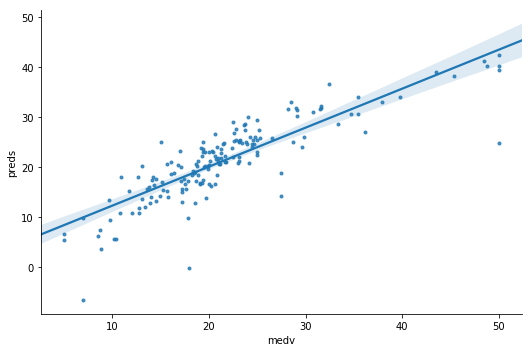

In [120]:
graph1 = sns.lmplot(data=final_score_df, x='medv', y='preds', markers=".", size = 5, aspect = 1.5, )

### Extra: Trying a Ensemble Regressor to see if it makes any difference

In [121]:
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor,ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor 

In [122]:
model_names = ['AdaBoostRegressor','BaggingRegressor', 'ExtraTreesRegressor',
               'GradientBoostingRegressor', 'RandomForestRegressor']
models = [AdaBoostRegressor(),BaggingRegressor(), ExtraTreesRegressor(),
               GradientBoostingRegressor(), RandomForestRegressor()]

mse = []
mae = []
msle = []
medae = []
r2 = []
trained_model= []
time_train = []

for model in models:
    start = time.time()
    model.fit(X_train, y_train)
    
    mse.append(mean_squared_error(y_test, model.predict(X_test)))
    mae.append(mean_absolute_error(y_test, model.predict(X_test)))
    msle.append(mean_squared_log_error(y_test, abs(model.predict(X_test))))
    medae.append(median_absolute_error(y_test, model.predict(X_test)))
    r2.append(model.score(X_test, y_test))
    
    stop = time.time()
    tr_time = stop - start
    time_train.append(tr_time)
    trained_model.append(model)

models = pd.DataFrame(data = {'model': model_names, 'time_train': time_train,
                      'MAE': mae, 'MSE': mse, 'MSLE': msle, 'MEDAE': medae, 'R2': r2})

In [123]:
total_models = pd.concat([total_models, models])

In [124]:
models.sort_values('MSE')

,model,time_train,MAE,MSE,MSLE,MEDAE,R2
3,GradientBoostingRegressor,0.034439,1.989713,8.492467,0.019463,1.329503,0.887782
2,ExtraTreesRegressor,0.013615,2.068323,10.271548,0.022025,1.310000,0.864274
4,RandomForestRegressor,0.018411,2.323772,11.859466,0.026129,1.580000,0.843291
1,BaggingRegressor,0.023113,2.385689,13.128555,0.029009,1.610000,0.826522
0,AdaBoostRegressor,0.075933,2.761406,15.349711,0.037828,2.279070,0.797172


All ensemble regressors are doing better than the linear models (considerably)

In [125]:
parameter = 'MSE'

In [126]:
best_model = trained_model[models[models[parameter] == models[parameter].min()].index[0]]
preds = best_model.predict(X_test)
final_score_df = pd.concat([X_test, y_test], axis = 1)
final_score_df['preds'] = preds

In [127]:
final_score_df[['medv', 'preds']].sample(10)

,medv,preds
208,24.4,21.896146
432,16.1,19.622241
17,17.5,17.292811
209,20.0,18.257290
262,48.8,44.555794
131,19.6,19.723711
82,24.8,23.736320
412,17.9,11.009792
414,7.0,8.052247
418,8.8,7.061798


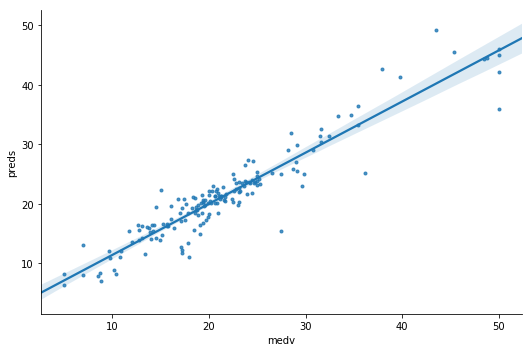

In [128]:
graph2 = sns.lmplot(data=final_score_df, x='medv', y='preds', markers=".", size = 5, aspect = 1.5, )

We also don't get any kind of negative predictions. 

### Finally we try Support Vector Estimators and see how they compare

In [129]:
from sklearn.svm import LinearSVR, NuSVR, SVR

As SVM's are dependent on their kernels, we try them with different ones

In [130]:
model_names = ['LinearSVR', 'NuSVR-Linear','NuSVR-Poly','NuSVR-RBF','NuSVR-Sigmoid',
               'SVR-Linear','SVR-Poly','SVR-RBF','SVR-Sigmoid']
models = [LinearSVR(), NuSVR(kernel='linear'), NuSVR(kernel='poly'),
          NuSVR(kernel='rbf'), NuSVR(kernel = 'sigmoid'), SVR(kernel='linear'),
          SVR(kernel='poly'), SVR(kernel='rbf'), SVR(kernel = 'sigmoid')]

mse = []
mae = []
msle = []
medae = []
r2 = []
trained_model= []
time_train = []

for model in models:
    start = time.time()
    model.fit(X_train, y_train)
    
    mse.append(mean_squared_error(y_test, model.predict(X_test)))
    mae.append(mean_absolute_error(y_test, model.predict(X_test)))
    msle.append(mean_squared_log_error(y_test, abs(model.predict(X_test))))
    medae.append(median_absolute_error(y_test, model.predict(X_test)))
    r2.append(model.score(X_test, y_test))
    
    stop = time.time()
    tr_time = stop - start
    time_train.append(tr_time)
    trained_model.append(model)
    print("Model Trained")
models = pd.DataFrame(data = {'model': model_names, 'time_train': time_train,
                      'MAE': mae, 'MSE': mse, 'MSLE': msle, 'MEDAE': medae, 'R2':r2})

In [131]:
total_models = pd.concat([total_models, models])

In [132]:
models.sort_values('MSE')

,model,time_train,MAE,MSE,MSLE,MEDAE,R2
1,NuSVR-Linear,0.020553,3.028155,22.392916,0.071637,1.941636,0.704105
5,SVR-Linear,0.013299,3.113871,23.847461,0.083086,1.978347,0.684885
0,LinearSVR,0.004700,3.123428,24.589359,0.082405,1.848871,0.675081
6,SVR-Poly,0.009768,3.434201,26.858304,0.088135,2.151266,0.645100
2,NuSVR-Poly,0.008695,3.533333,27.017181,0.084061,2.233038,0.643001
7,SVR-RBF,0.017100,3.029396,27.489522,0.054828,1.577899,0.636759
4,NuSVR-Sigmoid,0.019821,3.453193,28.113797,0.051800,2.136676,0.628510
3,NuSVR-RBF,0.011547,3.133750,28.370844,0.056814,1.745240,0.625114
8,SVR-Sigmoid,0.017483,3.392652,28.920508,0.053122,2.214507,0.617850


In [133]:
parameter = 'MSE'

In [134]:
best_model = trained_model[models[models[parameter] == models[parameter].min()].index[0]]
preds = best_model.predict(X_test)
final_score_df = pd.concat([X_test, y_test], axis = 1)
final_score_df['preds'] = preds

In [135]:
final_score_df[['medv', 'preds']].sample(10)

,medv,preds
104,20.1,20.598134
185,29.6,23.282188
278,29.1,29.167278
250,24.4,25.224757
17,17.5,17.197504
203,48.5,40.287664
497,18.3,19.069499
392,9.7,8.448607
322,20.4,22.392477
23,14.5,13.955162


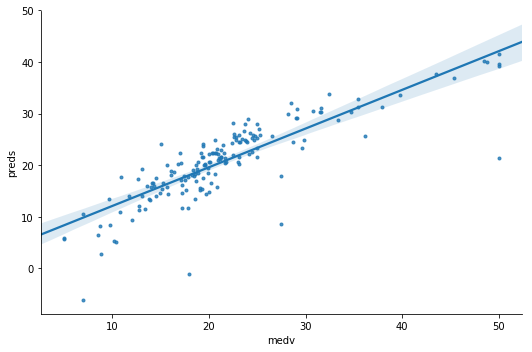

In [136]:
graph2 = sns.lmplot(data=final_score_df, x='medv', y='preds', markers=".", size = 5, aspect = 1.5, )

### Tree Regressors

In [137]:
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor

As SVM's are dependent on their kernels, we try them with different ones

In [138]:
model_names = ['DecisionTreeRegressor', 'ExtraTreeRegressor']
models = [DecisionTreeRegressor(), ExtraTreeRegressor()]

mse = []
mae = []
msle = []
medae = []
r2 = []
trained_model= []
time_train = []

for model in models:
    start = time.time()
    model.fit(X_train, y_train)
    
    mse.append(mean_squared_error(y_test, model.predict(X_test)))
    mae.append(mean_absolute_error(y_test, model.predict(X_test)))
    msle.append(mean_squared_log_error(y_test, abs(model.predict(X_test))))
    medae.append(median_absolute_error(y_test, model.predict(X_test)))
    r2.append(model.score(X_test, y_test))
    
    stop = time.time()
    tr_time = stop - start
    time_train.append(tr_time)
    trained_model.append(model)
    #print(model)
models = pd.DataFrame(data = {'model': model_names, 'time_train': time_train,
                      'MAE': mae, 'MSE': mse, 'MSLE': msle, 'MEDAE': medae, 'R2': r2})

In [139]:
total_models = pd.concat([total_models, models])

In [140]:
models.sort_values('MSE')

,model,time_train,MAE,MSE,MSLE,MEDAE,R2
0,DecisionTreeRegressor,0.005001,3.010778,19.208144,0.037723,2.0,0.746188
1,ExtraTreeRegressor,0.003267,3.534731,29.894671,0.067652,2.3,0.604978


In [141]:
parameter = 'MSE'

In [142]:
best_model = trained_model[models[models[parameter] == models[parameter].min()].index[0]]
preds = best_model.predict(X_test)
final_score_df = pd.concat([X_test, y_test], axis = 1)
final_score_df['preds'] = preds

In [143]:
final_score_df[['medv', 'preds']].sample(10)

,medv,preds
473,29.8,22.0
375,15.0,36.5
66,19.4,19.6
101,26.5,29.4
84,23.9,22.9
24,15.6,18.1
194,29.1,24.5
250,24.4,25.0
489,7.0,14.4
452,16.1,15.2


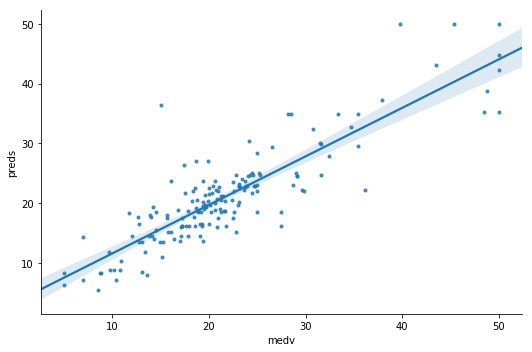

In [144]:
graph2 = sns.lmplot(data=final_score_df, x='medv', y='preds', markers=".", size = 5, aspect = 1.5, )

In [145]:
stop_script = time.time()

In [146]:
script_time = stop_script - start_script
print("This script took: ", round(script_time, 2), " seconds to run.")

This script took:  3.01  seconds to run.


In [149]:
total_models.sort_values('R2', ascending=False)

,model,time_train,MAE,MSE,MSLE,MEDAE,R2
3,GradientBoostingRegressor,0.034439,1.989713,8.492467,0.019463,1.329503,0.887782
2,ExtraTreesRegressor,0.013615,2.068323,10.271548,0.022025,1.310000,0.864274
4,RandomForestRegressor,0.018411,2.323772,11.859466,0.026129,1.580000,0.843291
1,BaggingRegressor,0.023113,2.385689,13.128555,0.029009,1.610000,0.826522
0,AdaBoostRegressor,0.075933,2.761406,15.349711,0.037828,2.279070,0.797172
0,DecisionTreeRegressor,0.005001,3.010778,19.208144,0.037723,2.000000,0.746188
0,LinearRegression,0.023141,3.148256,20.724023,0.081719,2.312603,0.726157
5,Ridge,0.003140,3.146038,20.751678,0.081357,2.337690,0.725792
2,BayesianRidge,0.003551,3.134114,20.908178,0.080722,2.321120,0.723724
1,ARDRegression,0.297215,3.164629,21.436285,0.080393,2.382550,0.716745
